In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


<H1 style="color:blue">1.Data loading</H1>

In [5]:
df  = pd.read_csv('student_marks.csv')

In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [8]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [9]:
df.shape

(200, 2)

In [10]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


Text(0.5, 1.0, 'Study Hours Vs Student Marks')

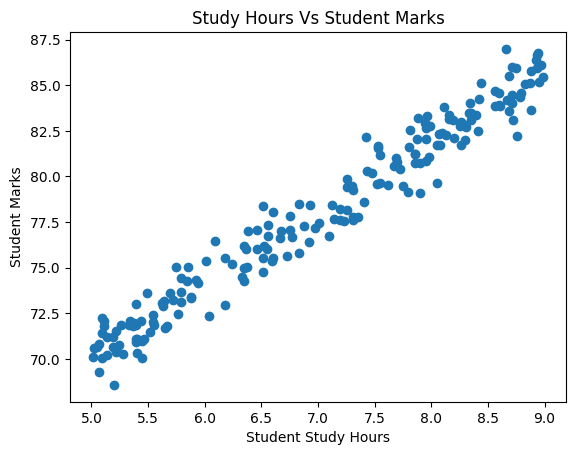

In [12]:
plt.scatter(df.study_hours,df.student_marks)
plt.xlabel("Student Study Hours")
plt.ylabel("Student Marks")
plt.title("Study Hours Vs Student Marks")


<H1 style="color:blue" >2.Data Cleaning & Preprocessing</H1>

In [13]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [14]:
df.study_hours.mean()

np.float64(6.9959487179487185)

In [15]:
df2=df.fillna(df.study_hours.mean())

In [16]:
df2

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
195,7.530000,81.67
196,8.560000,84.68
197,8.940000,86.75
198,6.600000,78.05


In [25]:
df2.info

<bound method DataFrame.info of      study_hours  student_marks
0       6.830000          78.50
1       6.560000          76.74
2       6.995949          78.68
3       5.670000          71.82
4       8.670000          84.19
..           ...            ...
195     7.530000          81.67
196     8.560000          84.68
197     8.940000          86.75
198     6.600000          78.05
199     8.350000          83.50

[200 rows x 2 columns]>

In [26]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [27]:
X = df2[['study_hours']]   # Feature must be 2D
y = df2['student_marks']   # Target can stay 1D

In [20]:
!pip install scikit-learn

<H1 style="color:blue">3.ML model selection and training</H1>

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)   # ✅ Now works

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


<H1 style="color:blue">4.Evaluate Model</H1>

In [22]:
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression Equation: Marks = {:.2f} * StudyHours + {:.2f}".format(lr.coef_[0], lr.intercept_))
print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)

Regression Equation: Marks = 3.93 * StudyHours + 50.44
MAE: 0.9876755341052214
MSE: 1.4540976212481111
R² Score: 0.942580760104548


<H1 style="color:blue">5.Predict</H1>

In [32]:
def predict_marks(hours):
    return lr.predict([[hours]])[0]

print("Predicted marks for 7 hours:", predict_marks(7))

Predicted marks for 7 hours: 77.92319839515261


C:\Users\Tanzina\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<H1 style="color:blue">6.Visualization</H1>

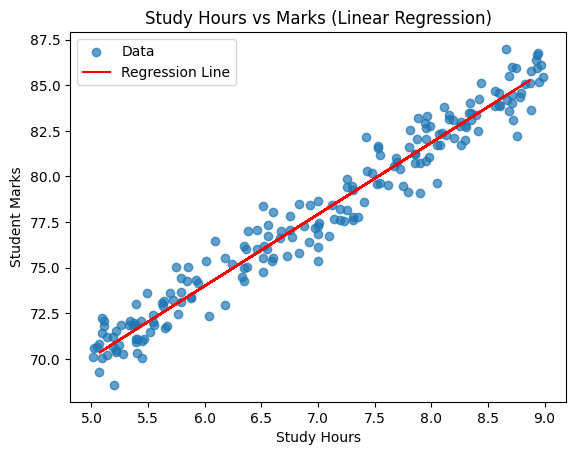

In [33]:
plt.scatter(df2.study_hours, df2.student_marks, alpha=0.7, label="Data")
plt.plot(X_test, y_pred, color='red', label="Regression Line")
plt.xlabel("Study Hours")
plt.ylabel("Student Marks")
plt.title("Study Hours vs Marks (Linear Regression)")
plt.legend()
plt.show()
